## Take Home Exercise 0 Answers

There's 15 visualizations below. Creation of each visualization is worth 1 point.

We will use the San Francisco Library data: https://data.sfgov.org/Culture-and-Recreation/Library-Usage/qzz6-2jup

Please create all plots as similar to the ones you can see below.

Please match:
- x-label name
- y-label name
- title
- orientation of plots
- type of plot
- data passed into plot

No need to *exactly* match but you should be close in:
- t-tick values (some libraries may show them slightly differently) 
- y-tick values (some libraries may show them slightly differently)
- size of fonts (though I used `sns.set_context('talk')`)
- figure size
- padding of title from plot (I used `y=1.015`)
- padding of labels (I used `labelpad=16`)

You can use whatever viz library in Python to create these ceate these such as Pandas Plot, Matplotlib, Seaborn, Plotly or something else.

### Import Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as tick
%matplotlib inline

### Read in Data

In [4]:
df = pd.read_csv('Library_Usage.csv')

### Set Visualization Styles

In [5]:
sns.set_context('talk')
sns.set_style('darkgrid')

### Bar Plot of Frequency of Age Range of Patrons

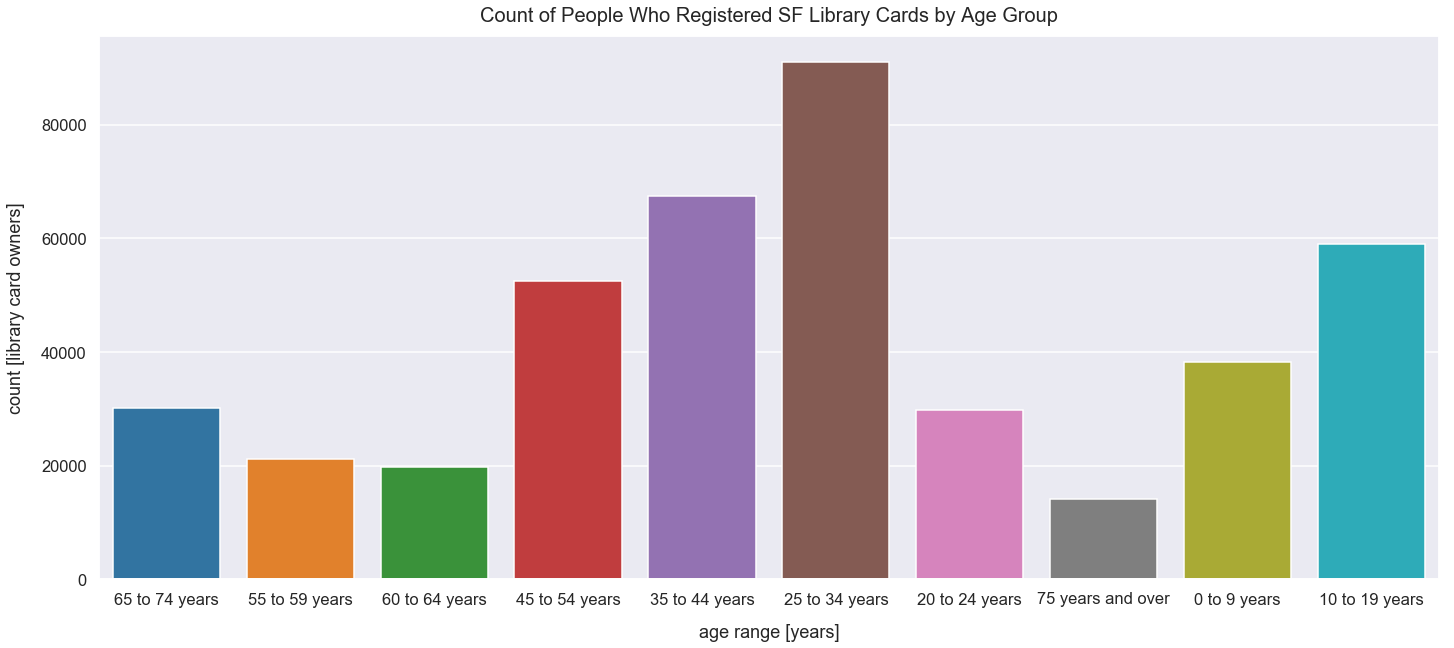

In [6]:
plt.figure(figsize=(24, 10))
sns.countplot(x='Age Range', data=df)
plt.xlabel("age range [years]", labelpad=16)
plt.ylabel("count [library card owners]", labelpad=16)
plt.title("Count of People Who Registered SF Library Cards by Age Group", y=1.015, fontsize=20);

This initial vertical bar plot looks OK, but I think there are several glaring issues:

- It's difficult to read all the ages from left to right because they extend very far wide with the width of the plot.
- The bar widths are uncessarily wide because the widths adjust based on the size of the bar label (ex - 60 to 64 years).
- The x-ticks have repeated units of "years".
- The y-ticks are difficult to read because it's difficult to easily count the number of zeroes for each numerical value. 

Next, let's try simply making this a horizontal bar plot.

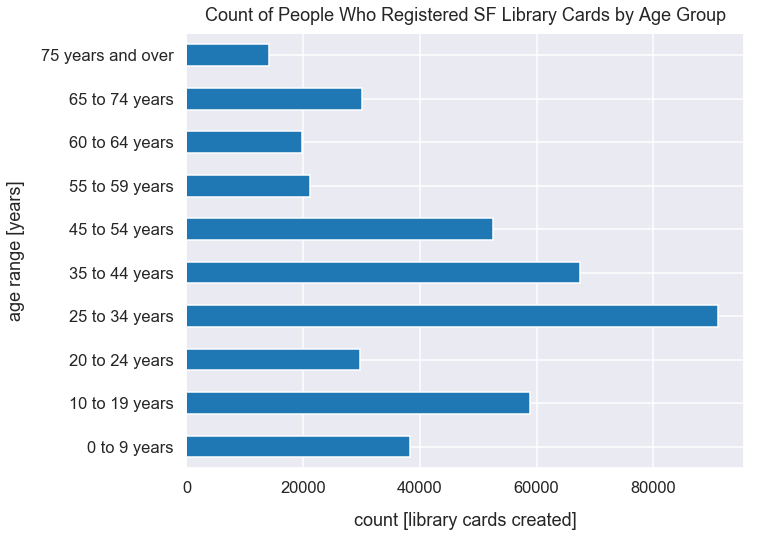

In [7]:
plt.figure(figsize=(10, 8))
df.groupby('Age Range').size().plot(kind='barh')
plt.xlabel("count [library cards created]", labelpad=16)
plt.ylabel("age range [years]", labelpad=16)
plt.title("Count of People Who Registered SF Library Cards by Age Group", y=1.015);

This plot seems slightly easier to interpret since it's not as large and easy to read the age range values now.

However, the x-ticks still have lots of zeroes. Let's try to simplify it by making new y-values and mentioning in the x-label they're in thousands.

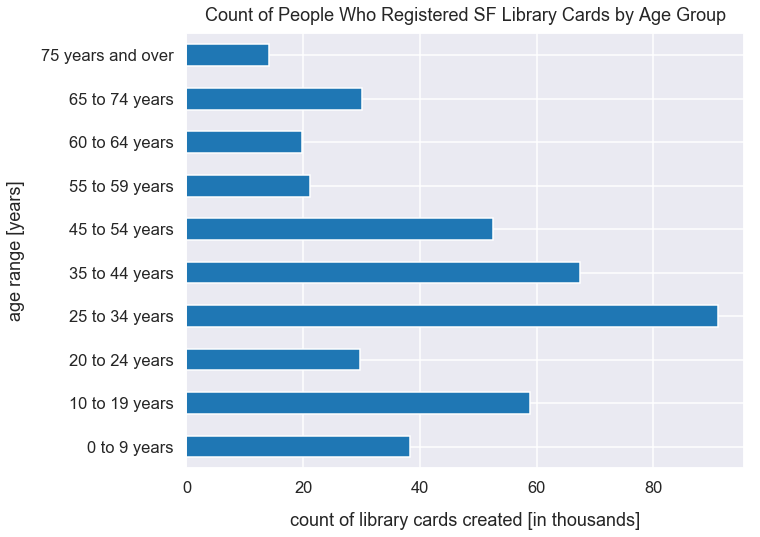

In [8]:
plt.figure(figsize=(10, 8))
(df.groupby('Age Range').size()/1000).plot(kind='barh')
plt.xlabel("count of library cards created [in thousands]", labelpad=16)
plt.ylabel("age range [years]", labelpad=16)
plt.title("Count of People Who Registered SF Library Cards by Age Group", y=1.015);

To some, this might look easier to read. However, I'm worried someone will see the value 20 or 40 and forget to read the x-label that the number is in thousands. I would prefer if we mark those integers with `K` afterwards to signify they're in thousands. Let's try it!

Hint: https://stackoverflow.com/a/40573050/1710454

In [9]:
def format_ticks(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val/1000000)
        return '{:}M'.format(val)
    elif tick_val > 1000:
        val = int(tick_val/1000)
        return '{:}K'.format(val)
    elif tick_val < 1000:
        return int(tick_val)
    else:
        return tick_val

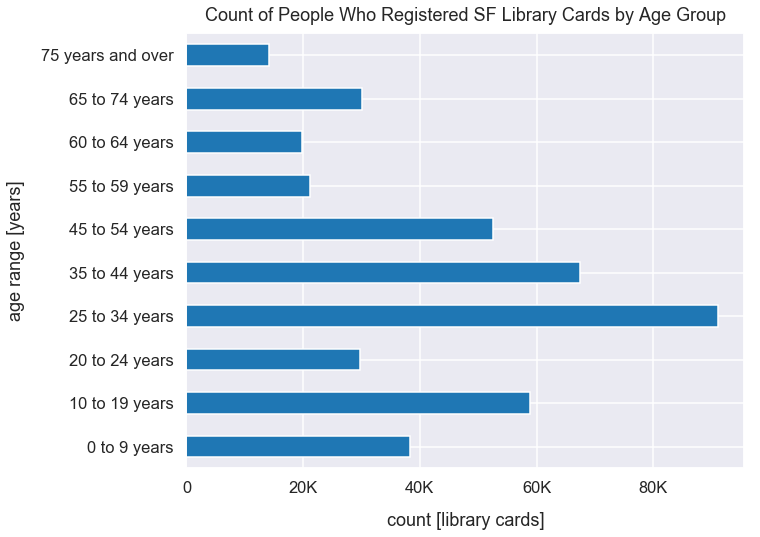

In [10]:
plt.figure(figsize=(10, 8))
(df.groupby('Age Range').size()).plot(kind='barh')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [library cards]", labelpad=16)
plt.ylabel("age range [years]", labelpad=16)
plt.title("Count of People Who Registered SF Library Cards by Age Group", y=1.015);

OK! I like it! I think the x-tick values are much easier to read now. I doubt anyone will misinterpret them.

However, we still have an issue with the y-ticks. It says `year` over...and over...and over...

We can fix it!

Hints:

- Python membership string operator. Try `"over" in "over 75"` versus `"over" in "0 to 9"`: https://www.tutorialspoint.com/python/membership_operators_example.html
- Create new column from list: https://chrisalbon.com/python/data_wrangling/pandas_assign_new_column_dataframe/

In [35]:
new_age_values = []

for age in df['Age Range']:
    if "over" in str(age):
        new_age = "75+"
    elif str(age) == "0 to 9 years":
        new_age = "0 - 9"
    else:
        new_age = str(age)[0:2] + " -" + str(age)[5:8]
    new_age_values.append(new_age)

In [36]:
df['age_range'] = new_age_values

In [39]:
df['Age Range'].value_counts(dropna=False)

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
NaN                    215
Name: Age Range, dtype: int64

In [40]:
df['age_range'].value_counts(dropna=False)

25 - 34    91083
35 - 44    67390
10 - 19    58944
45 - 54    52492
0 - 9      38242
65 - 74    30141
20 - 24    29761
55 - 59    21230
60 - 64    19800
75+        14150
na -         215
Name: age_range, dtype: int64

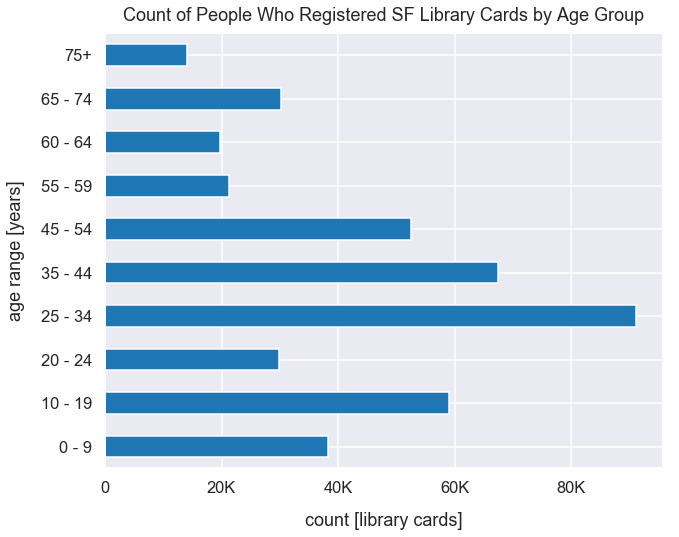

In [15]:
plt.figure(figsize=(10, 8))
(df.groupby('age_range').size()).plot(kind='barh')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [library cards]", labelpad=16)
plt.ylabel("age range [years]", labelpad=16)
plt.title("Count of People Who Registered SF Library Cards by Age Group", y=1.015);

I think this is best!

### Bar Plot of Frequency of Home Library Definition

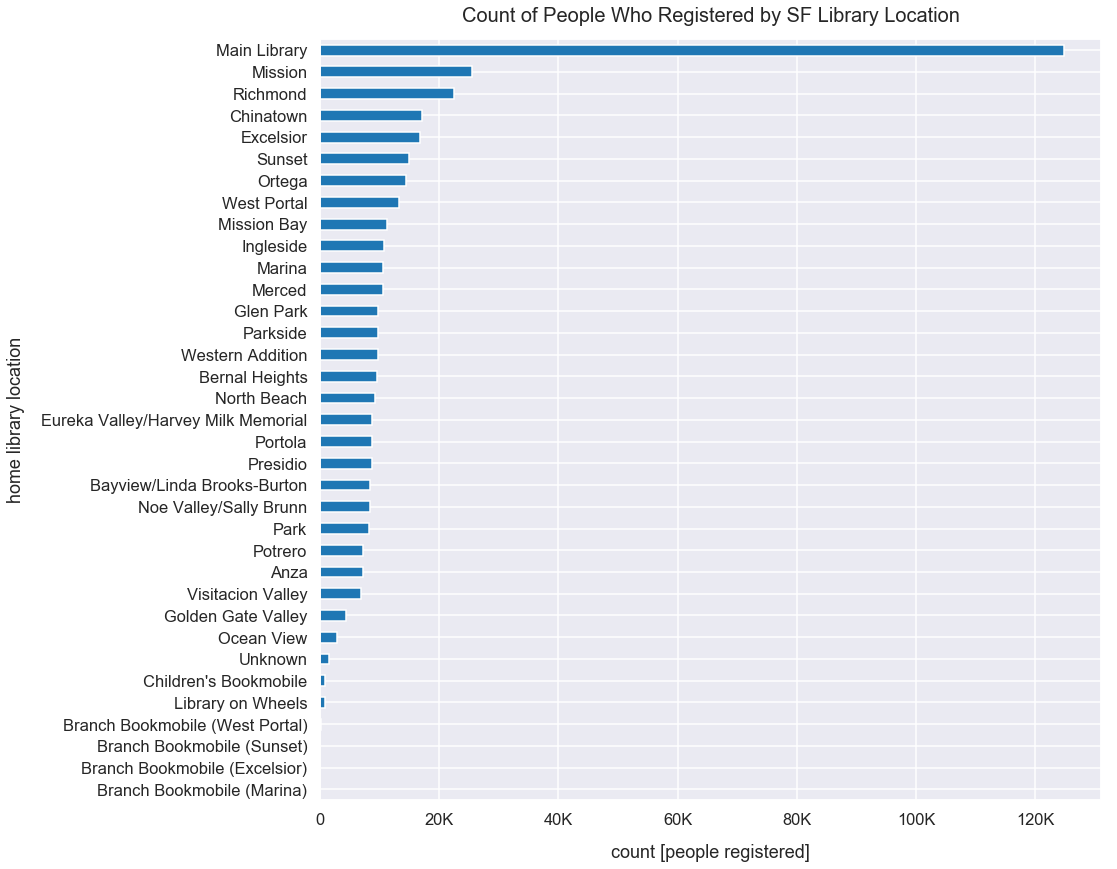

In [16]:
df['Home Library Definition'].value_counts(ascending=True).plot(kind='barh', figsize=(14, 14))
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [people registered]", labelpad=16)
plt.ylabel("home library location", labelpad=16)
plt.title("Count of People Who Registered by SF Library Location", y=1.015, fontsize=20);

With the graph above, it's difficult to tell the count for the `Children's Bookmobile` and ones below it. Let's make a new graph just to focus on that area.

In [17]:
count_registrants_childens_bookmobile = df['Home Library Definition'].value_counts().loc["Children's Bookmobile"]

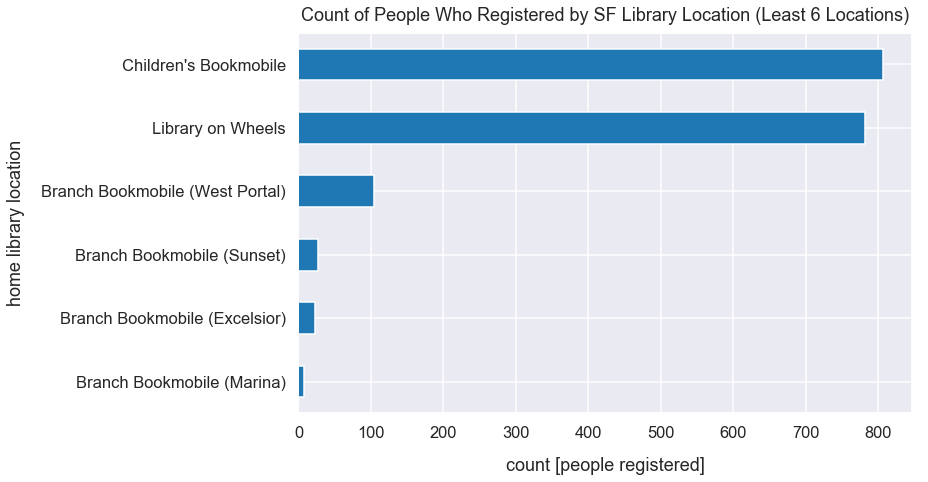

In [18]:
df['Home Library Definition'].value_counts(ascending=True)[df['Home Library Definition'].value_counts() <= count_registrants_childens_bookmobile].plot(kind='barh',
                                                                                                                                                       figsize=(11, 7))
plt.xlabel("count [people registered]", labelpad=16)
plt.ylabel("home library location", labelpad=16)
plt.title("Count of People Who Registered by SF Library Location (Least 6 Locations)", y=1.015);

### Bar Plot of Frequency of Patron Types

Hint: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.title.html#pandas.Series.str.title

In [19]:
df['Patron Type Definition'] = df['Patron Type Definition'].str.title()

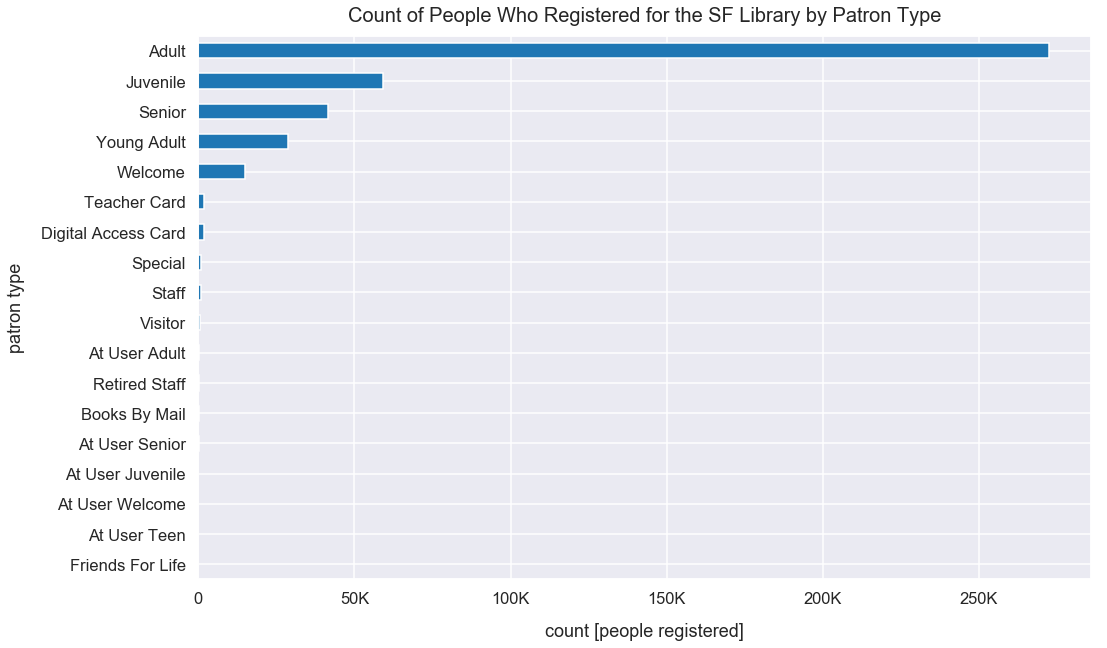

In [20]:
df['Patron Type Definition'].value_counts(ascending=True).plot(kind='barh', figsize=(16, 10))
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [people registered]", labelpad=16)
plt.ylabel("patron type", labelpad=16)
plt.title("Count of People Who Registered for the SF Library by Patron Type", y=1.015, fontsize=20);

### Bar Plot of Count of Patron Registrations by Year

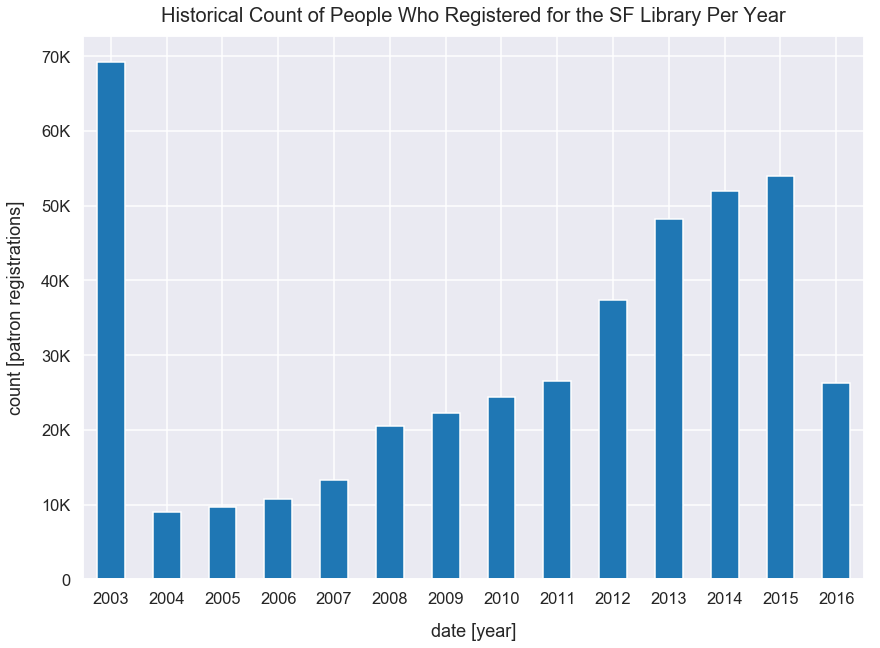

In [21]:
df['Year Patron Registered'].value_counts(sort=False).plot(kind='bar', figsize=(14, 10), rot=0)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.ylabel("count [patron registrations]", labelpad=16)
plt.xlabel("date [year]", labelpad=16)
plt.title("Historical Count of People Who Registered for the SF Library Per Year", y=1.015, fontsize=20);

The dataset was created in December of 2016; apparently card registrations are severely down in 2016. I figure there's stark competition from Hulu, Kindle online books and Netflix. Maybe fewer people moved into SF recently. Perhaps the count of people reading books year over year is declinining too. 

### Count of Type of Preference Notifications Over All Time

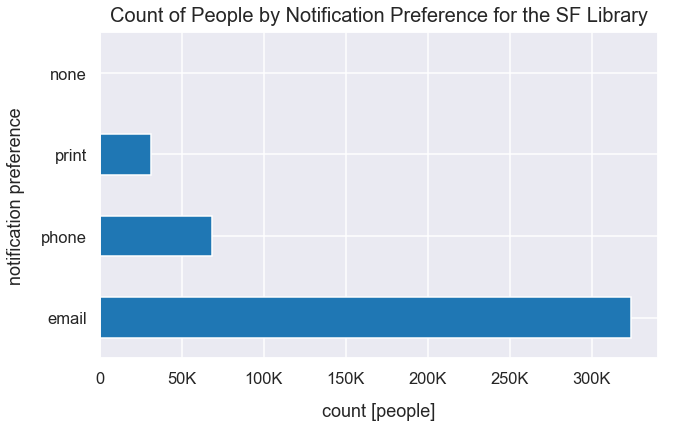

In [22]:
df['Notice Preference Definition'].value_counts().plot(kind='barh', figsize=(10, 6))
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [people]", labelpad=16)
plt.ylabel("notification preference", labelpad=16)
plt.title("Count of People by Notification Preference for the SF Library", y=1.015, fontsize=20);

### Count of Pople by Notification Preference Per Year

Hint: I used the Seaborn `countplot()` method

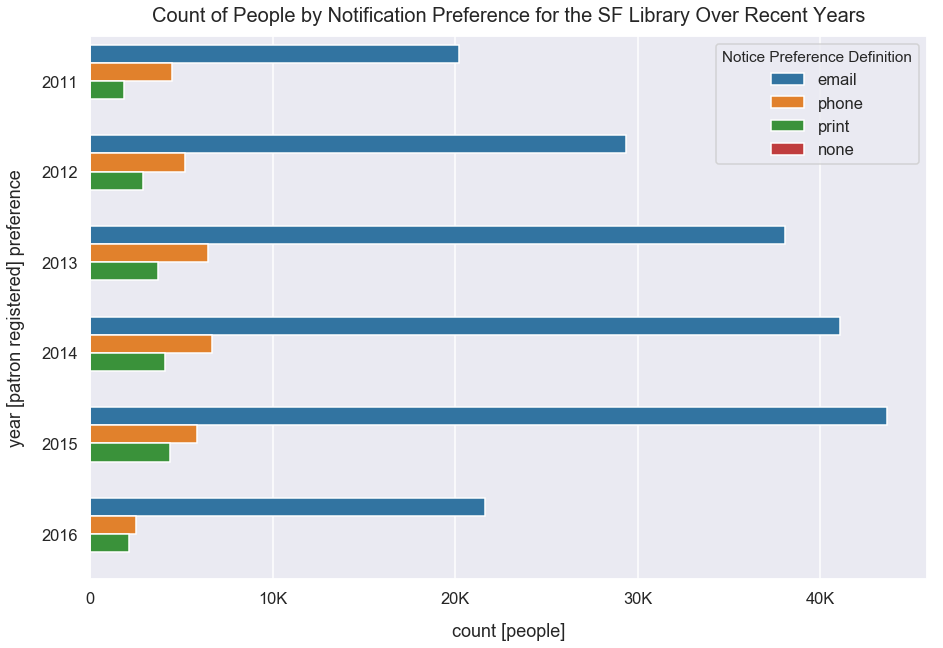

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(y="Year Patron Registered", hue="Notice Preference Definition", data=df[df['Year Patron Registered']>2010])
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [people]", labelpad=16)
plt.ylabel("year [patron registered]", labelpad=16)
plt.title("Count of People by Notification Preference for the SF Library Over Recent Years", y=1.015, fontsize=20);

I like how with this grouped bar chart, even being static, you can easily see the trend of count of people by notification preference over the years. From 2014 to 2015, there was a decline in phone numbers and this was likely due to a big shift in email. It's easy to create a spam filter on your email but difficult to impossible on your phone. Surprisingly, print notifications increase every year up to 2015. Perhaps the older generations prefer print?

### Notification Preference by Age Group

In [25]:
age_groups_ordered = sorted(df['age_range'].unique())

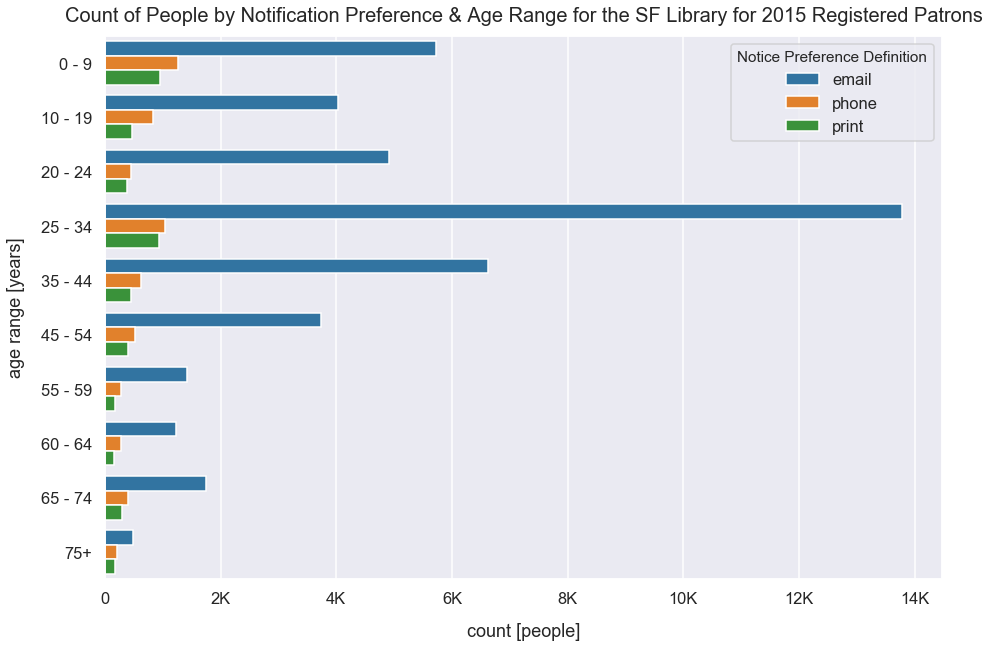

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(y="age_range", hue="Notice Preference Definition", data=df[df['Year Patron Registered']==2015], order=age_groups_ordered)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [people]", labelpad=16)
plt.ylabel("age range [years]", labelpad=16)
plt.title("Count of People by Notification Preference & Age Range for the SF Library for 2015 Registered Patrons", y=1.015, fontsize=20);

Here, you can easily see the pattern that older folks are more likely to opt for print or phone communications, while younger folks prefer email. 

It would also be helpful to do this comparsion with % of total people per age group on the x-axis instead of the count of people.

### Box Plot of Total Renewals by Library Card Owners

Hint: https://seaborn.pydata.org/generated/seaborn.boxplot.html

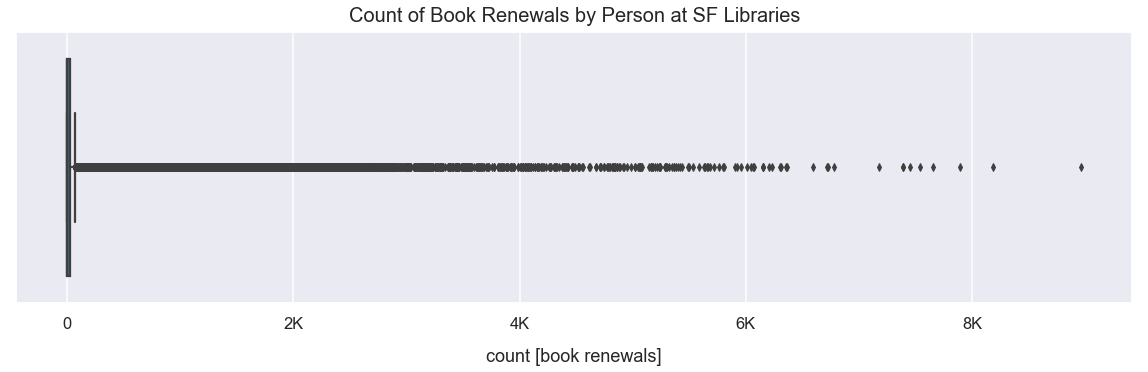

In [27]:
plt.figure(figsize=(20, 5))
sns.boxplot(df['Total Renewals'])
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.xlabel("count [book renewals]", labelpad=16)
plt.title("Count of Book Renewals by Person at SF Libraries", y=1.015, fontsize=20);

We can see that the figure above doesn't help use easily see the distribution of the smaller count of renewals and values like Q1, median and Q3. Instead, we just see a VERY long tail of many people that have renewed thousands of books from the SF public library. So, this visual is helpful to see the large range that exists and those faraway outliers.

Let's print out the percentiles for books renewed with the following percentiles `[.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95, .99, .995, .999]`.

Please see the `percentiles` argument of: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html

In [28]:
df['Total Renewals'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95, .99, .995, .999])

count    423448.000000
mean         59.657327
std         225.009917
min           0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           2.000000
60%           7.000000
70%          17.000000
75%          27.000000
80%          43.000000
90%         130.000000
95%         285.000000
99%         982.000000
99.5%      1440.765000
99.9%      2883.553000
max        8965.000000
Name: Total Renewals, dtype: float64

We can see the 75th percentile is at 27 books renewed. Let's build another box plot below and simply limit the x-range from -1 to 40.

Hint: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html

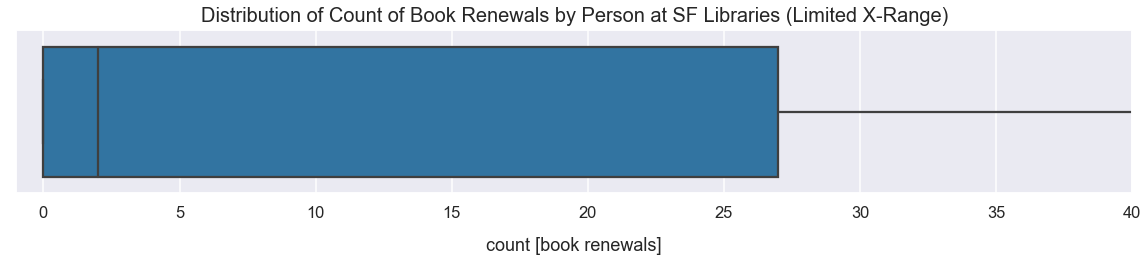

In [29]:
plt.figure(figsize=(20, 3))
sns.boxplot(df['Total Renewals'])
plt.xlim(-1, 40);
plt.xlabel("count [book renewals]", labelpad=16)
plt.title("Distribution of Count of Book Renewals by Person at SF Libraries (Limited X-Range)", y=1.015, fontsize=20);

Now, we can easily see Q1 at 0, median at 2 and Q3 at 27. However, I still think you can best present the results and distribution of the count of book renewals through text that explain the percentiles printed above from our use of the `describe()` method. The data is skewed to the right.

Learn more about skewness at: https://www.mathsisfun.com/data/skewness.html

### Box Plot of Total Renewals of Library Card Owners by their Age Range

Hint:
- You should use the `order` argument in `sns.boxplot()`.
- I set `plt.xlim(-1, 140)`

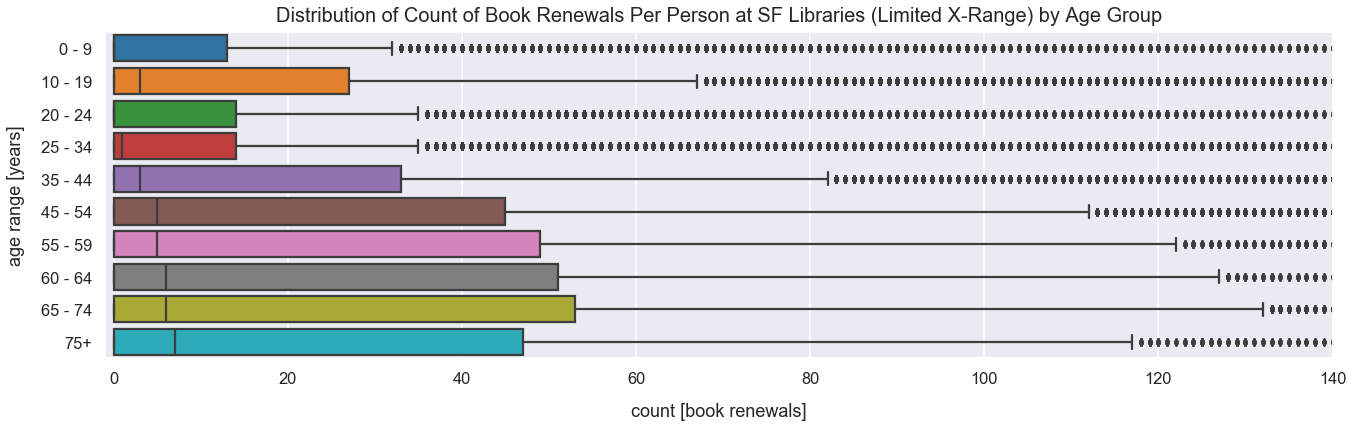

In [30]:
plt.figure(figsize=(22, 6))
sns.boxplot(x="Total Renewals", y="age_range", data=df, saturation=0.75, order=age_groups_ordered)
plt.xlim(-1, 140)
plt.xlabel("count [book renewals]", labelpad=16)
plt.ylabel("age range [years]", labelpad=16)
plt.title("Distribution of Count of Book Renewals Per Person at SF Libraries (Limited X-Range) by Age Group", y=1.015, fontsize=20);

In [31]:
df[df['age_range']=='0 - 9']['Total Renewals'].describe()

count    38242.000000
mean        43.980623
std        181.516001
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       5241.000000
Name: Total Renewals, dtype: float64

In [32]:
df[df['age_range']=='20 - 24']['Total Renewals'].describe()

count    29785.000000
mean        35.545677
std        131.595750
min          0.000000
25%          0.000000
50%          0.000000
75%         14.000000
max       4919.000000
Name: Total Renewals, dtype: float64

Overall, I'm still not a huge fan of this last box plot. A lot of information is missing with those outliers so it's a bit deceiving. And a large part of the boxes are shaded so it's a bit difficult to understand. If you were to present insights from this to your boss, I would recommend you simply describe in plain text the distribution.

For the most part, as people get older, there's a slight increase in the median number of books renewed.

The upper end of the IQR range for the count of book renewals seems to *drastically* increase as you increase in age from 34 to 75. 

The Q3 for the count of book renewals seems to slightly increase as you increase in age from 34 to 75. 

I'm shocked that 25% of people ages 35+ have renewed so many books! I aspire to be as well-read someday!